In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')    
# styles in matplot: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
import warnings
warnings.filterwarnings('ignore')

In [28]:
import os

In [30]:
data=pd.read_csv('C:/Users/Moon/Documents/codesquadz/breast-cancer.csv')

In [32]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#importing all the required ML packages 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB

plt.style.use('fivethirtyeight')


In [36]:
!pip install missingno


In [38]:
data.isnull().sum() # checking for total null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

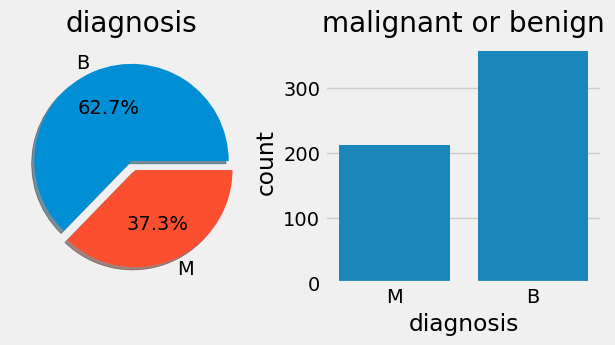

In [40]:
f,ax=plt.subplots(1,2,figsize=(7,3))
data['diagnosis'].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot(x='diagnosis',data=data,ax=ax[1])
ax[1].set_title('malignant or benign')
plt.show()

# 0=M,1=B

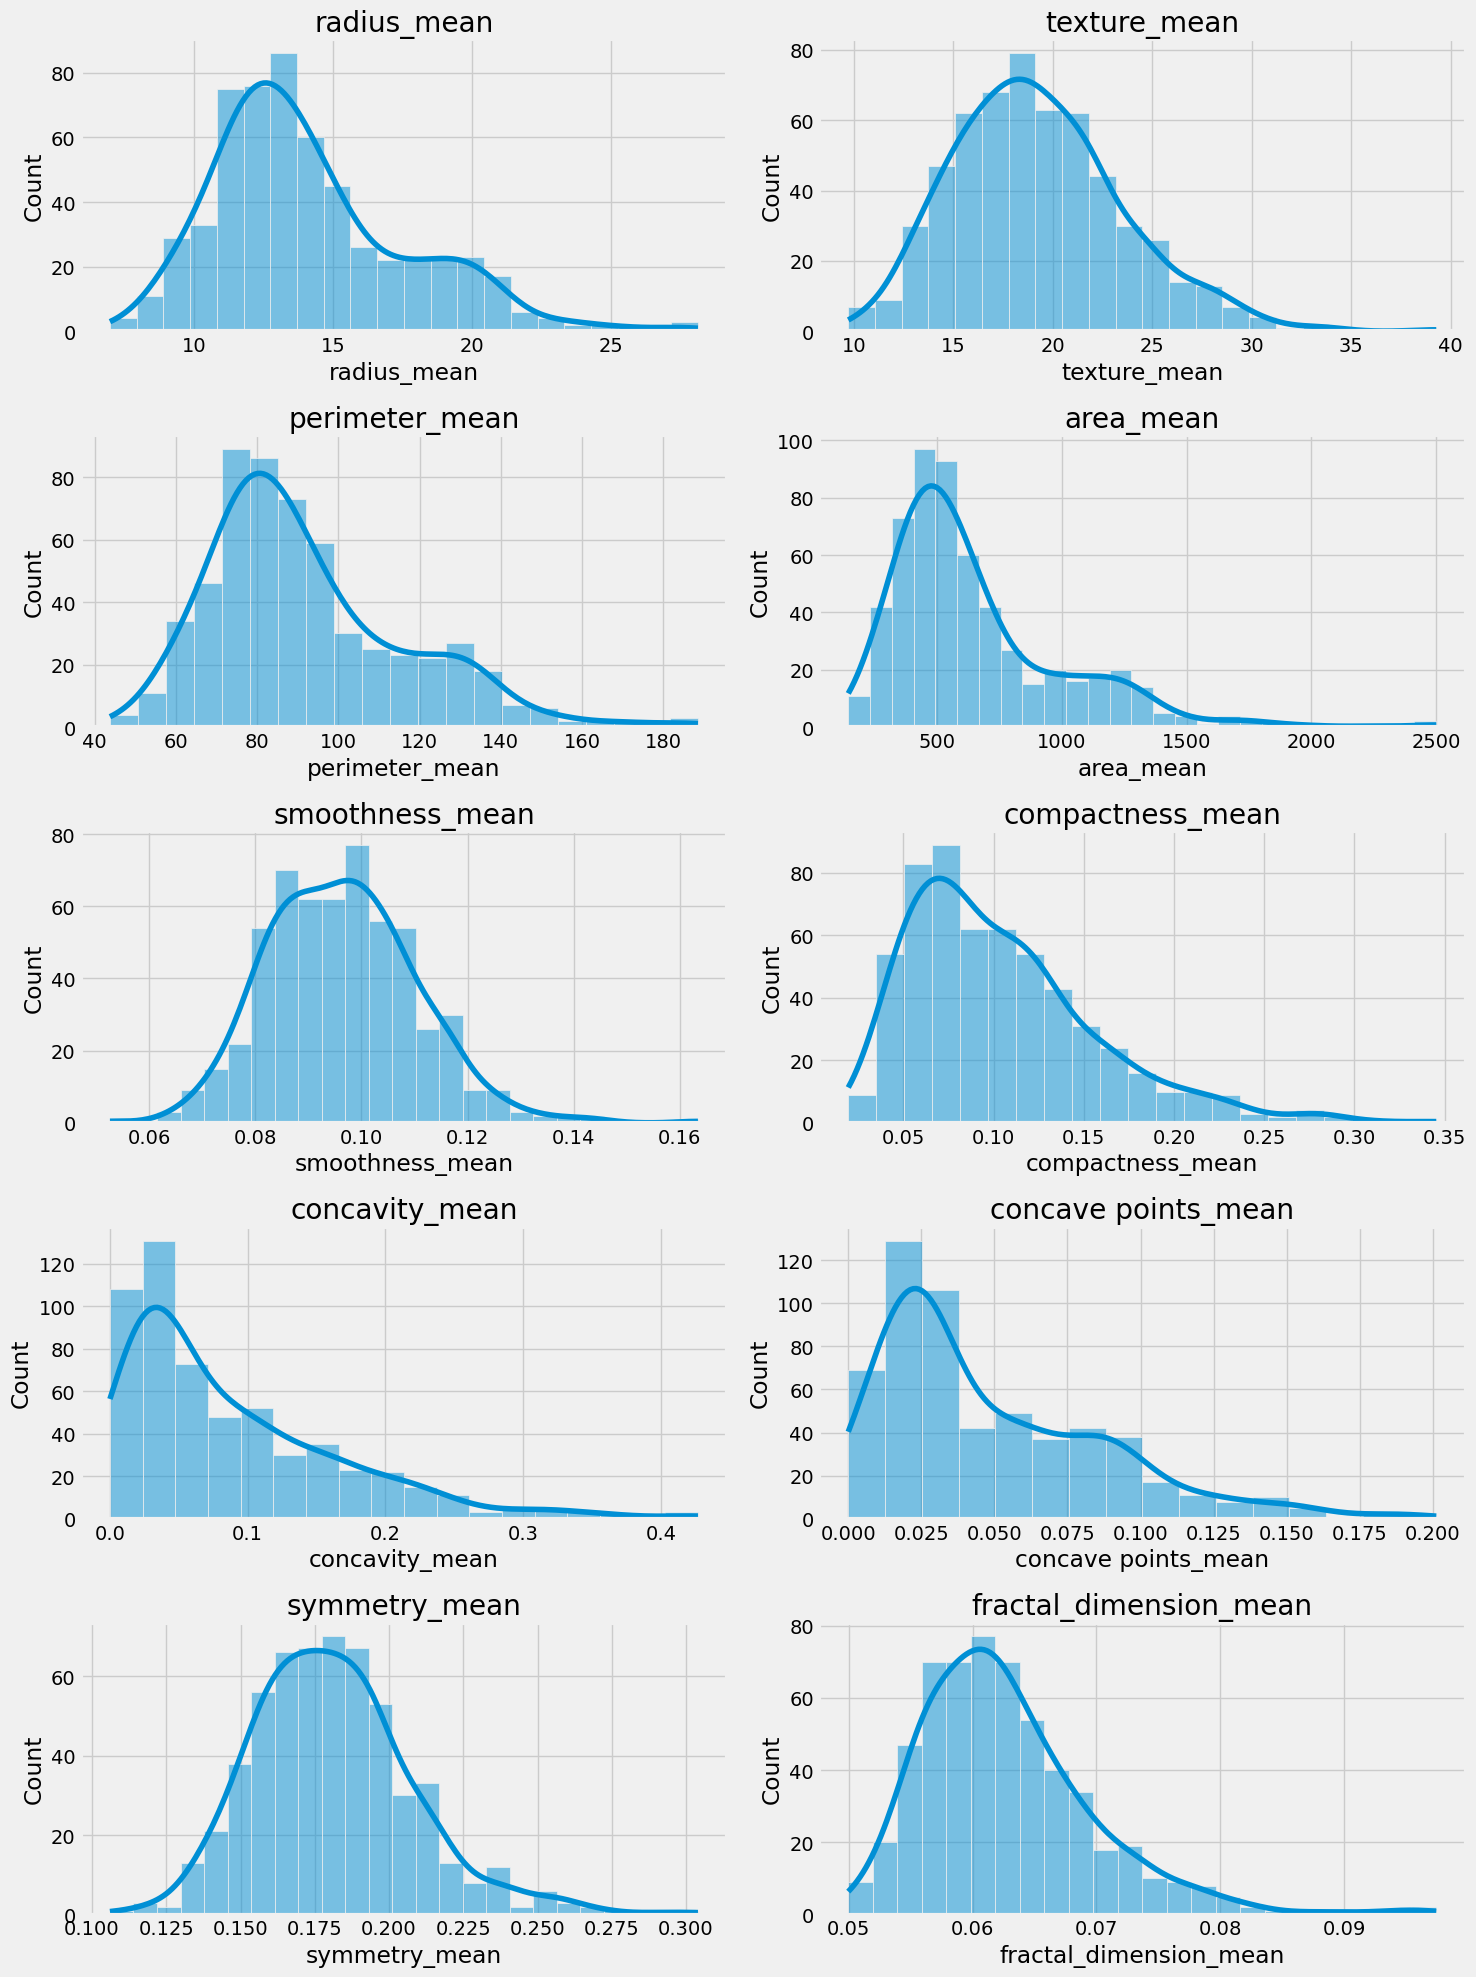

In [42]:
# Inspecting the Mean features
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot each feature
for i, feature in enumerate(mean_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

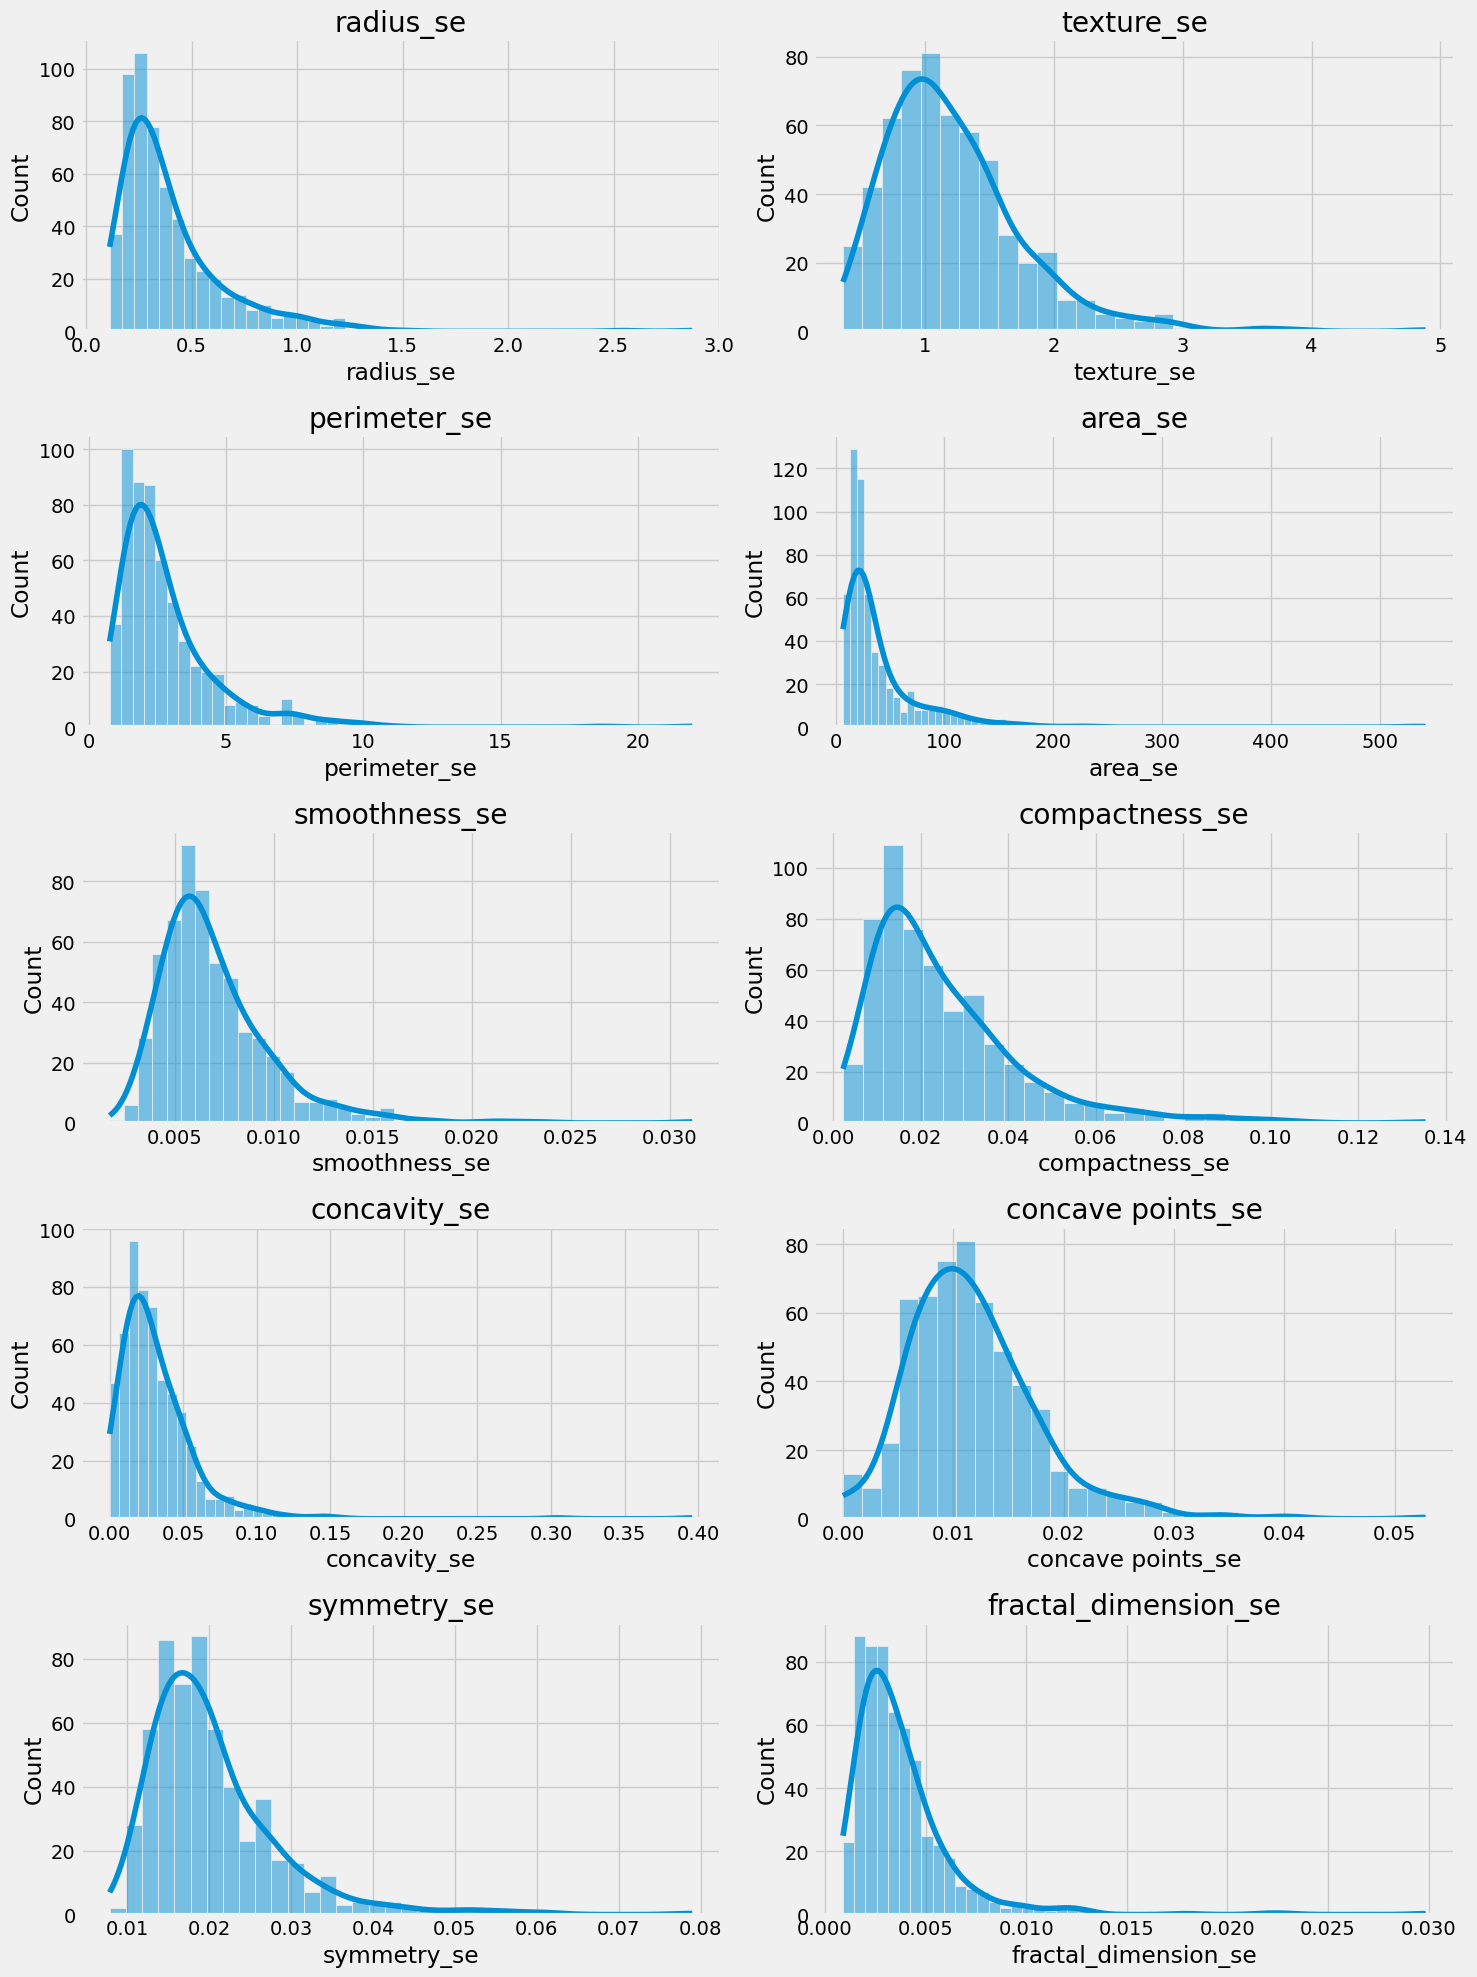

In [44]:
se_features = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
               'compactness_se', 'concavity_se', 'concave points_se',
               'symmetry_se', 'fractal_dimension_se'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(se_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

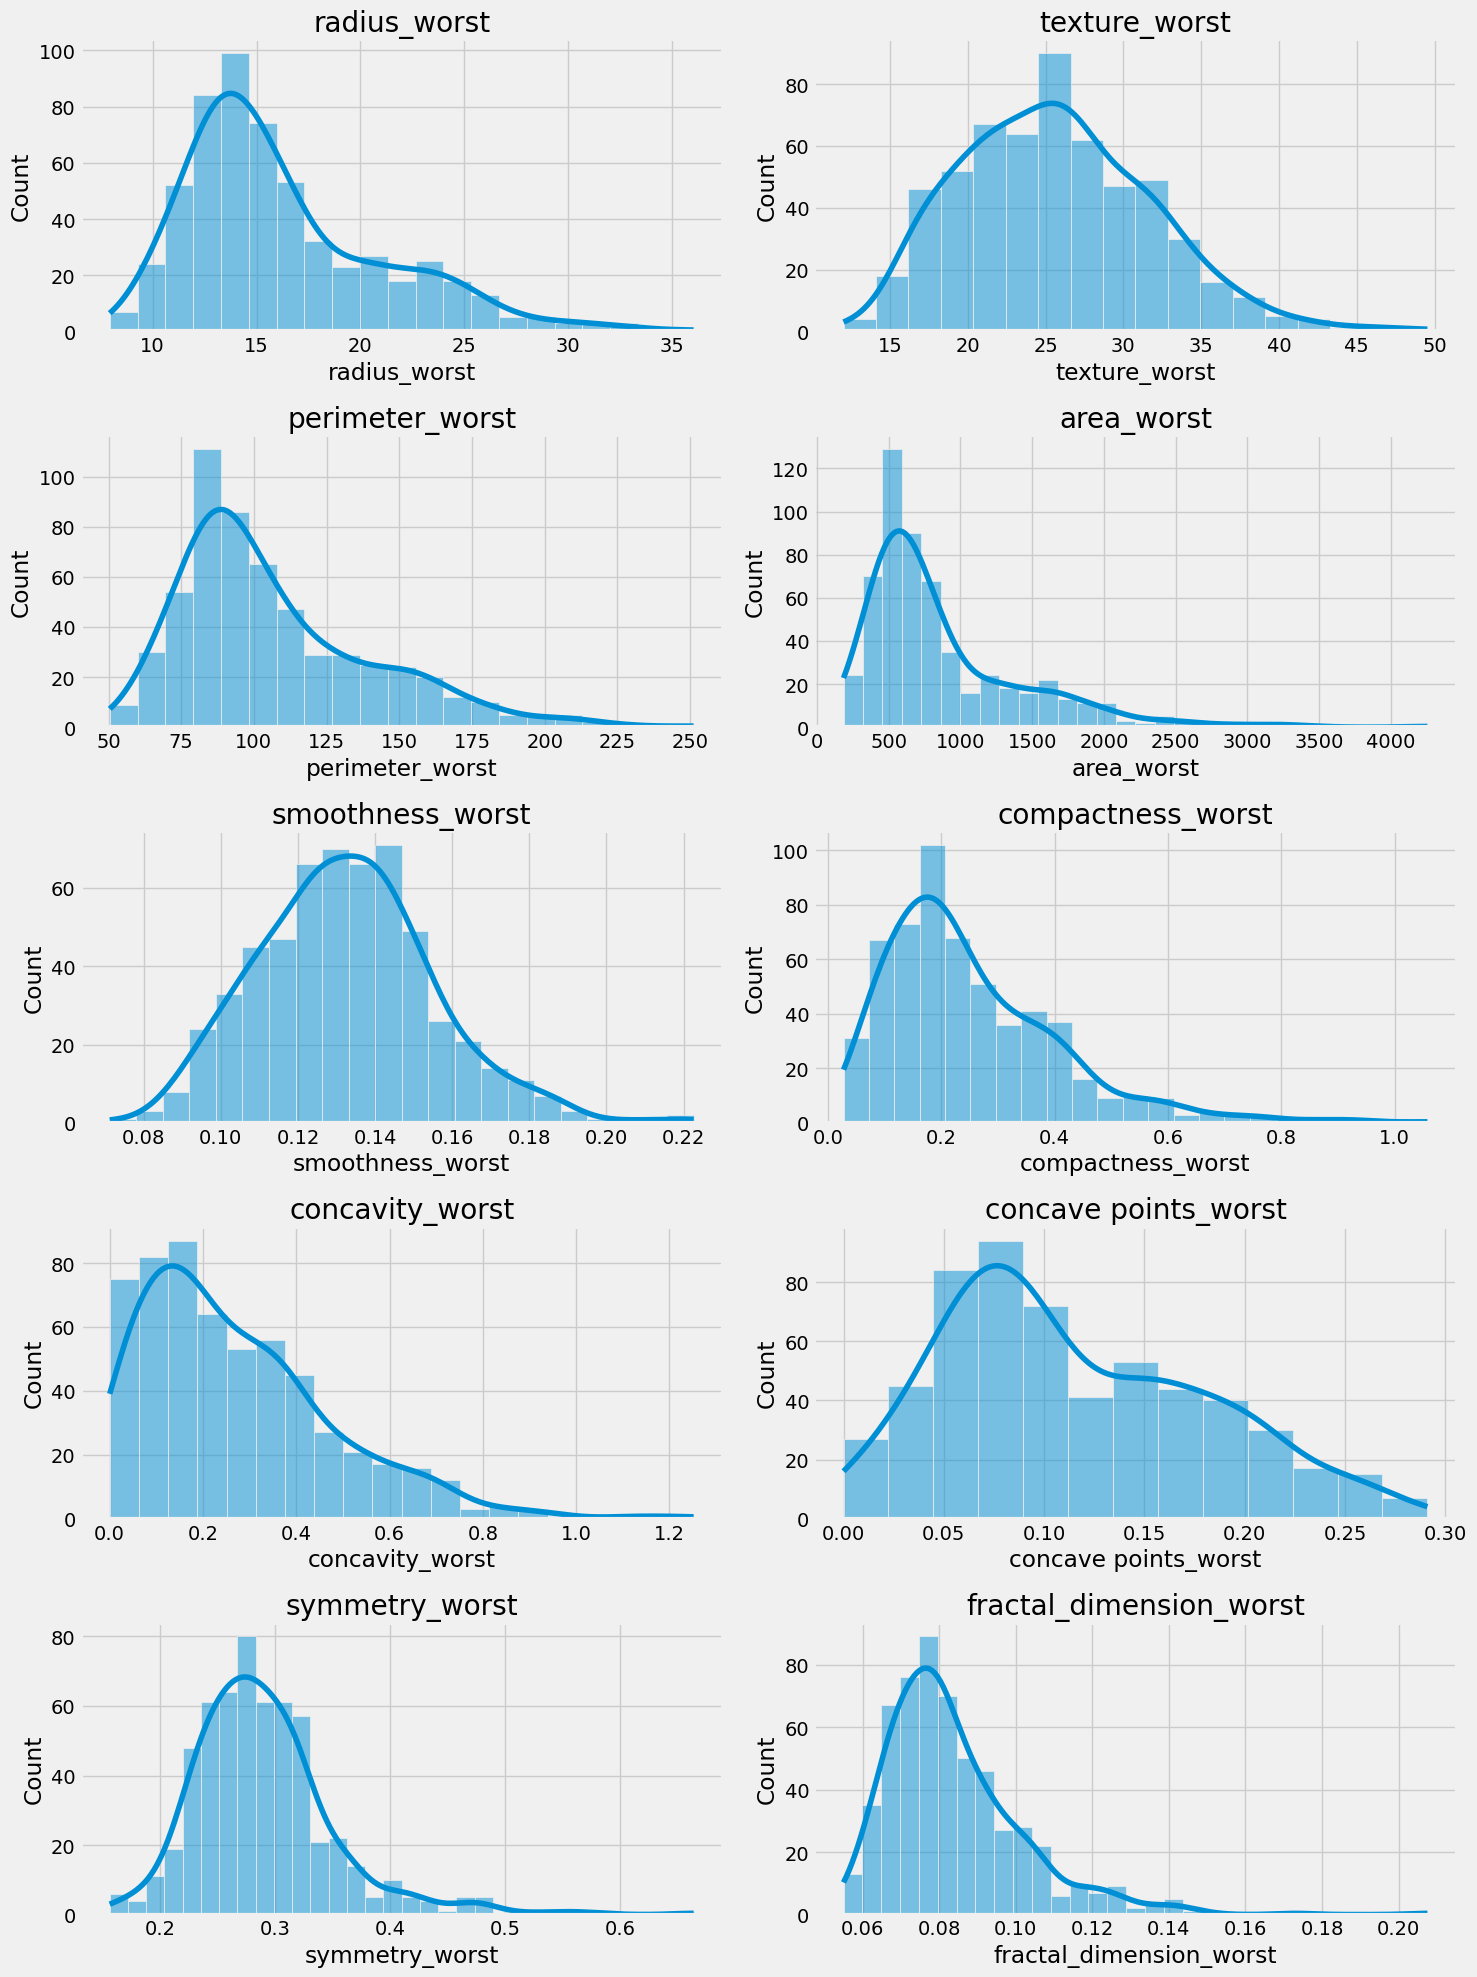

In [46]:
worst_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
               'smoothness_worst','compactness_worst', 'concavity_worst',
               'concave points_worst','symmetry_worst', 'fractal_dimension_worst'
]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(worst_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [48]:
#correlation between the features
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

print(data['diagnosis'].head(30))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: diagnosis, dtype: int64


In [14]:
data.groupby(['id','diagnosis'])['diagnosis'].count()

id         diagnosis
8670       M            1
8913       B            1
8915       B            1
9047       B            1
85715      M            1
                       ..
911157302  M            1
911296201  M            1
911296202  M            1
911320501  B            1
911320502  B            1
Name: diagnosis, Length: 569, dtype: int64

In [16]:
id_counts = data['id'].value_counts()
print(id_counts)

id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64


In [18]:
#counting no. of malignant and benign
counts= data['diagnosis'].value_counts()
counts

diagnosis
B    357
M    212
Name: count, dtype: int64

In [34]:
print(data.info()) #check datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
numeric_data = data.select_dtypes(include=[np.number]) #filter numeric column


In [38]:
corr = numeric_data.corr() #calculate the correlation


In [42]:
from sklearn.preprocessing import LabelEncoder
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis']) #convert categorical data int to float


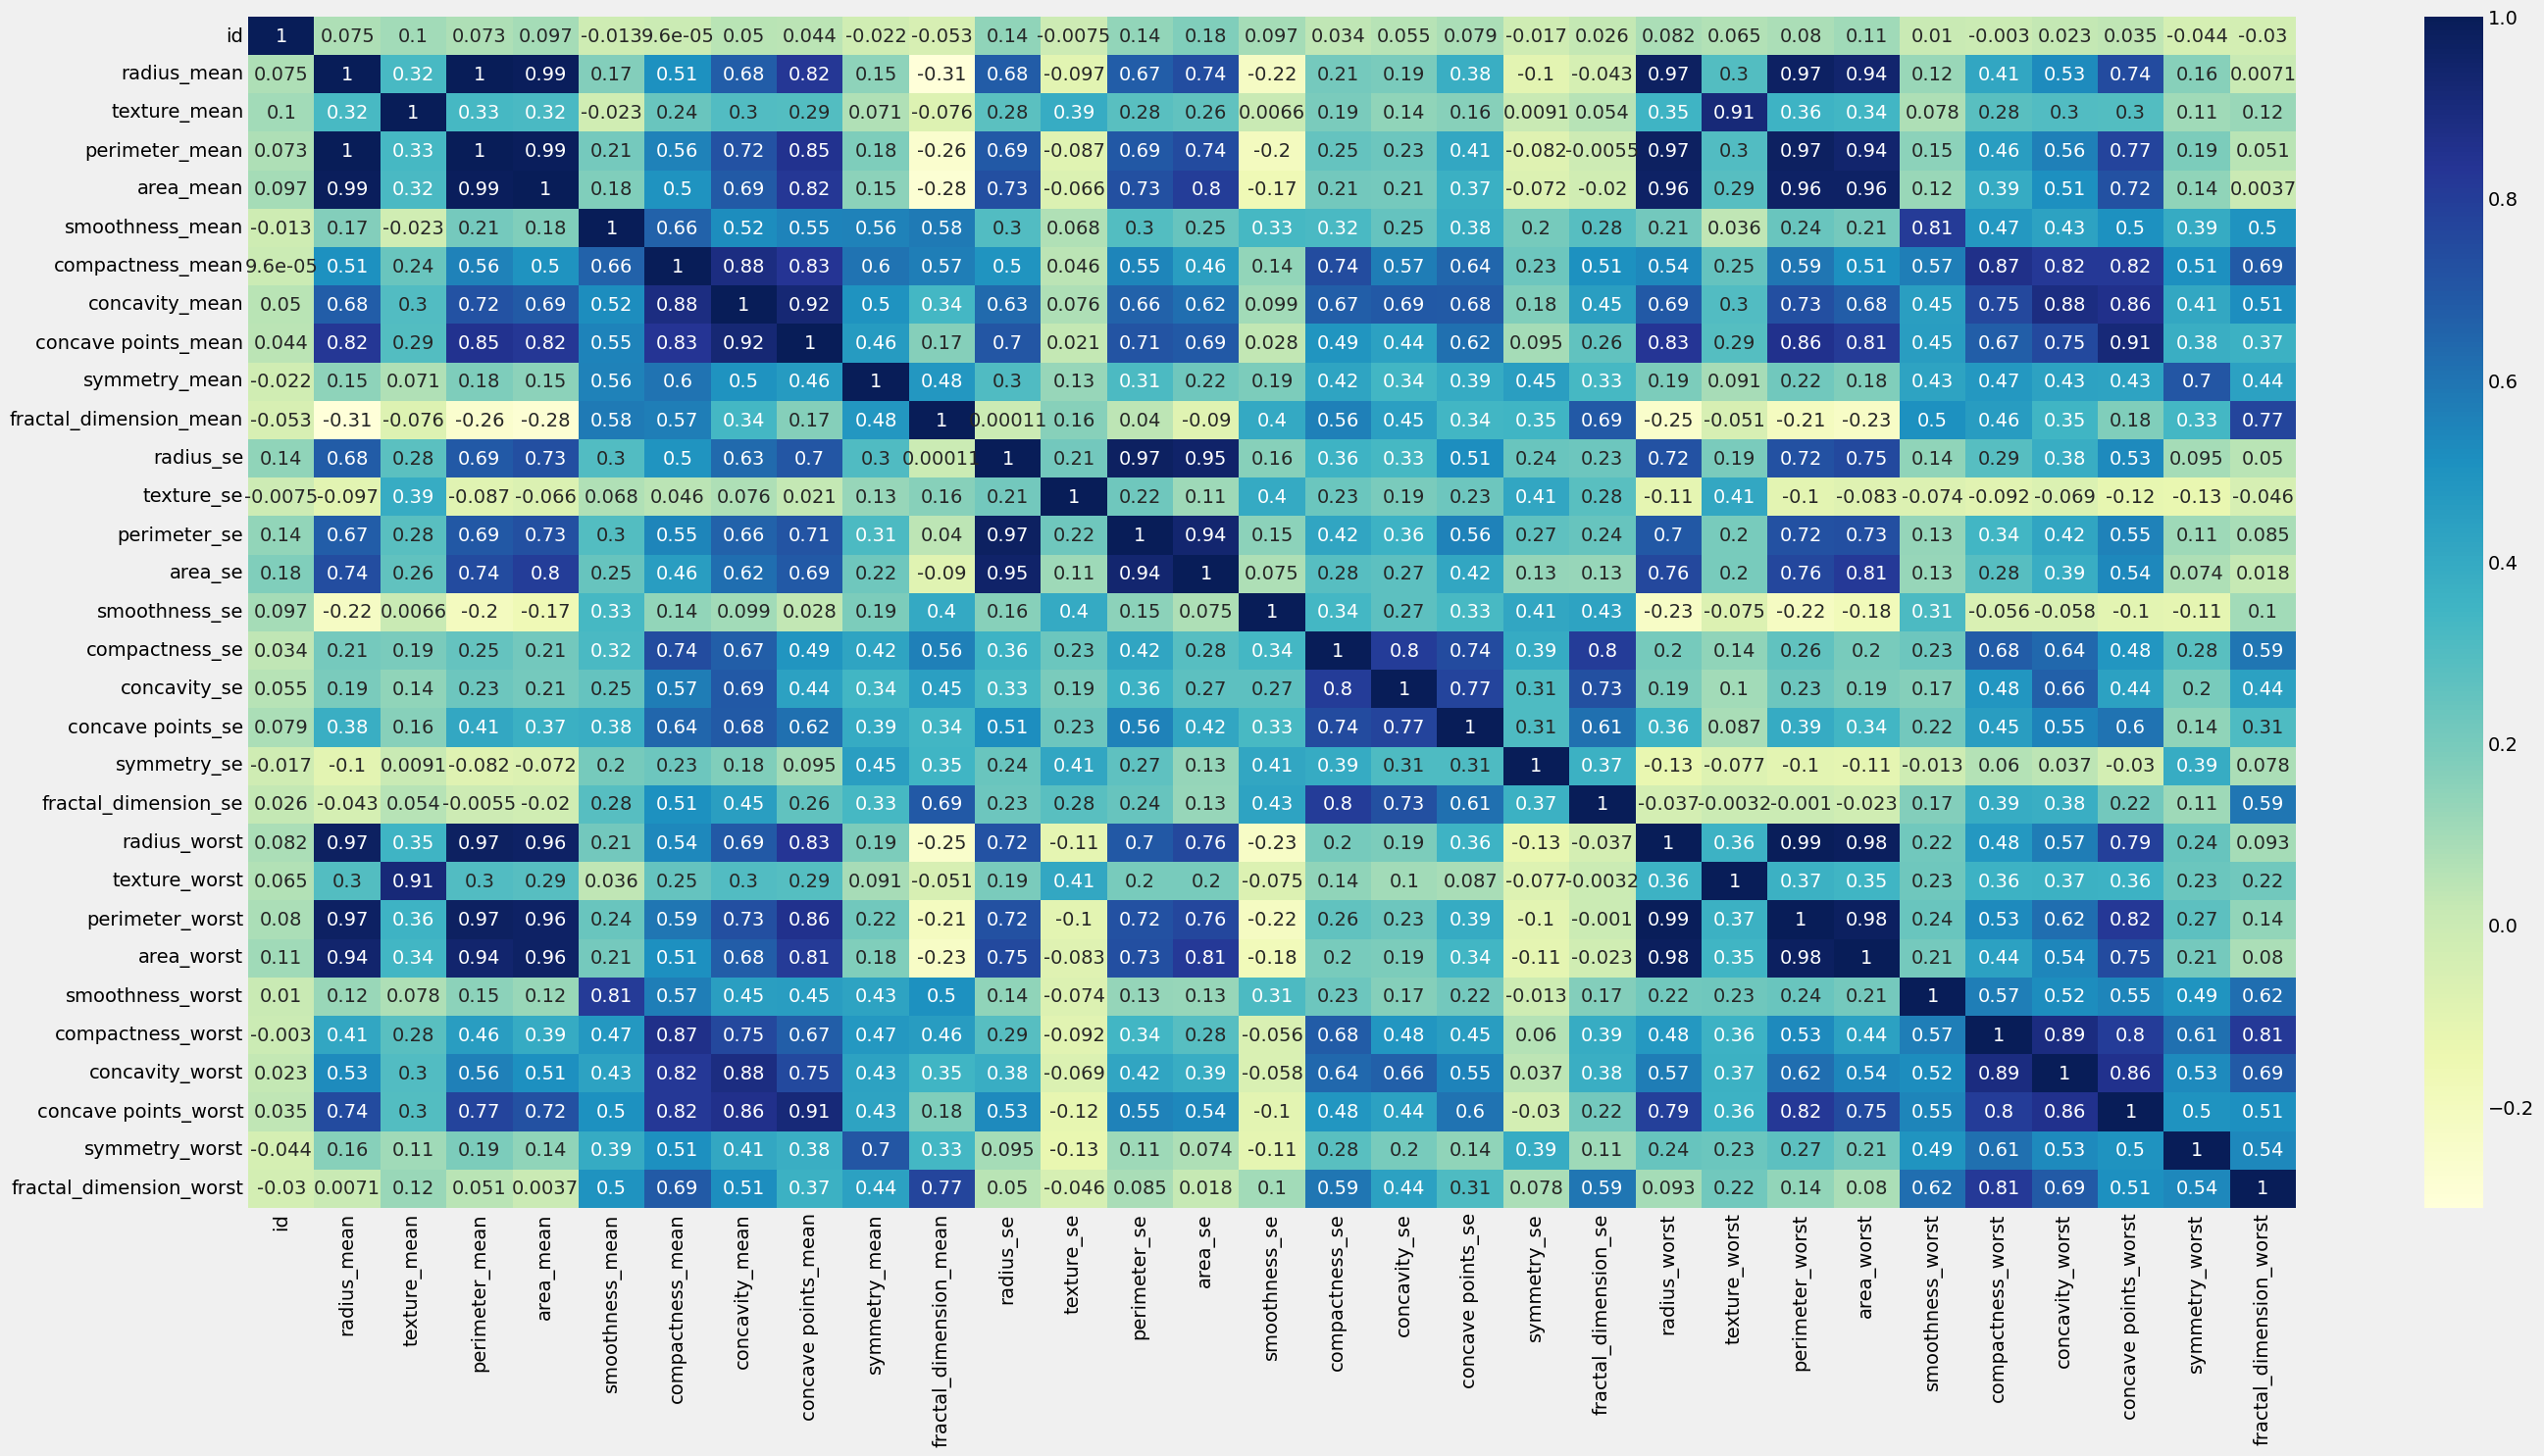

In [44]:
#create heatmap(find correlation
plt.figure(figsize=(30, 15))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


In [50]:
# splitting data
train_X = data.drop(columns=["diagnosis"])
train_Y = data["diagnosis"]

train_X , test_X , train_Y, test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=40)

In [52]:
print('Train features shape:', train_X.shape)  # (number of training samples, number of features)
print('Test features shape:', test_X.shape)    # (number of test samples, number of features)
print('Train target shape:', train_Y.shape)     # (number of training samples,)
print('Test target shape:', test_Y.shape)       # (number of test samples,)

Train features shape: (455, 31)
Test features shape: (114, 31)
Train target shape: (455,)
Test target shape: (114,)


In [54]:
#radial svm
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.6578947368421053


In [66]:
#logistic regression
model= LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the logistic regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the logistic regression is 0.9385964912280702


In [68]:
#Decision tree
model= DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9473684210526315


In [70]:
#KNN
model= KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8245614035087719


In [72]:
#Gaussian naive bayes
model= GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.6491228070175439


In [74]:
#Random forest
model= RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.956140350877193


In [56]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    print("Model :=>  ",i)
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    print(cv_result)
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

Model :=>   SVC()
[0.7173913  0.63043478 0.47826087 0.76086957 0.60869565 0.53333333
 0.62222222 0.66666667 0.55555556 0.55555556]
Model :=>   LogisticRegression()
[0.89130435 0.91304348 0.91304348 0.91304348 0.84782609 0.91111111
 0.95555556 0.95555556 0.88888889 0.88888889]
Model :=>   KNeighborsClassifier(n_neighbors=9)
[0.76086957 0.65217391 0.67391304 0.76086957 0.73913043 0.66666667
 0.73333333 0.75555556 0.57777778 0.6       ]
Model :=>   DecisionTreeClassifier()
[0.91304348 1.         0.91304348 0.91304348 0.91304348 0.84444444
 0.93333333 0.95555556 0.95555556 0.93333333]
Model :=>   GaussianNB()
[0.7173913  0.63043478 0.47826087 0.76086957 0.63043478 0.53333333
 0.64444444 0.66666667 0.55555556 0.57777778]
Model :=>   RandomForestClassifier()
[1.         0.97826087 0.95652174 0.97826087 0.93478261 0.91111111
 0.91111111 1.         0.97777778 0.97777778]


,CV Mean,Std
Radial Svm,0.612899,0.081946
Logistic Regression,0.907826,0.030395
KNN,0.692029,0.064437
Decision Tree,0.927440,0.038253
Naive Bayes,0.619517,0.081152
Random Forest,0.962560,0.031403


In [102]:
accuracy = [0.65, 0.93, 0.82,0.94,0.64,0.95]  # Replace with actual accuracy values


In [104]:
classifiers = ['Radial svm','Logistic Regression','KNN', 'Decision Tree','Naive Bayes','Random Forest']


<Axes: >

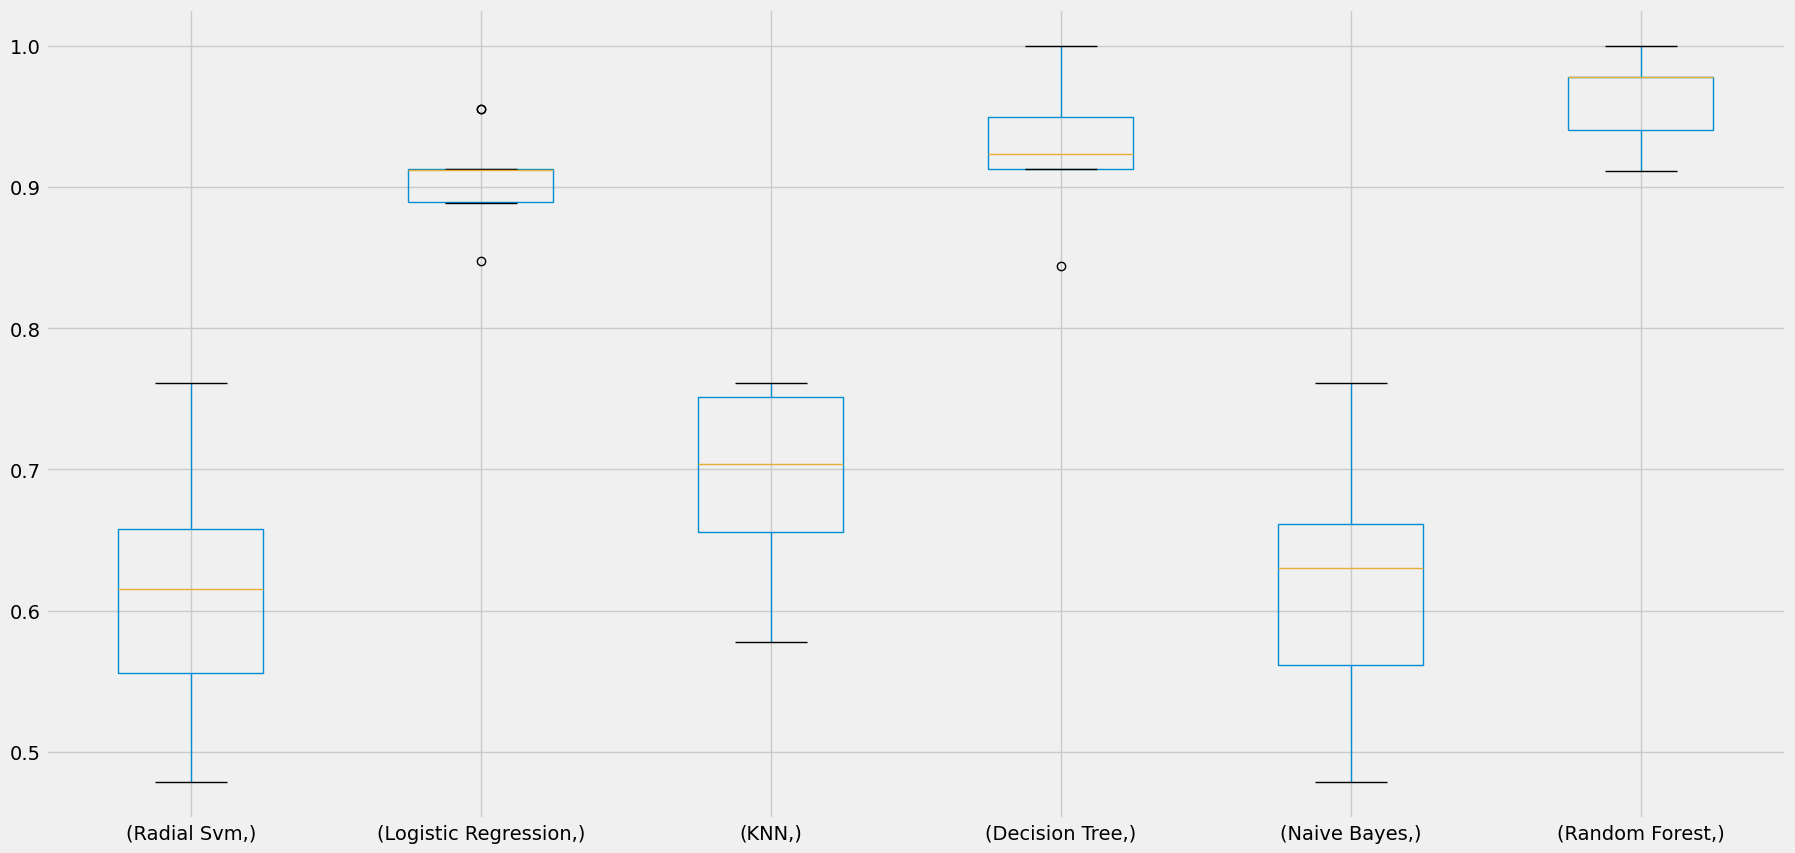

In [58]:
plt.subplots(figsize=(20,10))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

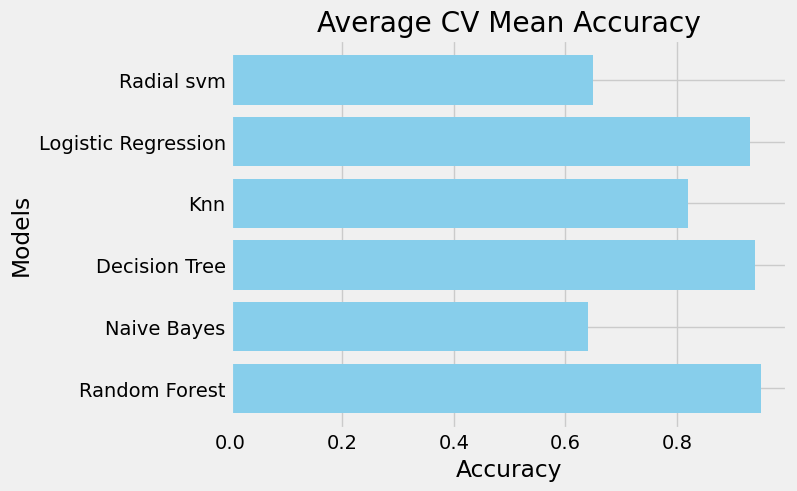

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
model_names = ['Random Forest', 'Naive Bayes', 'Decision Tree','Knn','Logistic Regression','Radial svm']
cv_means = [0.95, 0.64, 0.94, 0.82, 0.93, 0.65 ]

# Create the DataFrame
new_models_dataframe2 = pd.DataFrame({'Model': model_names, 'CV Mean': cv_means})
new_models_dataframe2.set_index('Model', inplace=True)

# Plot the bar chart
new_models_dataframe2['CV Mean'].plot.barh(width=0.8, color='skyblue')
plt.title('Average CV Mean Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Models')
fig = plt.gcf()
plt.show()


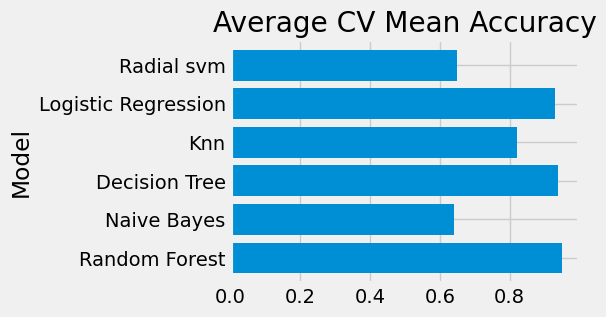

In [114]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(4,3)
plt.show()

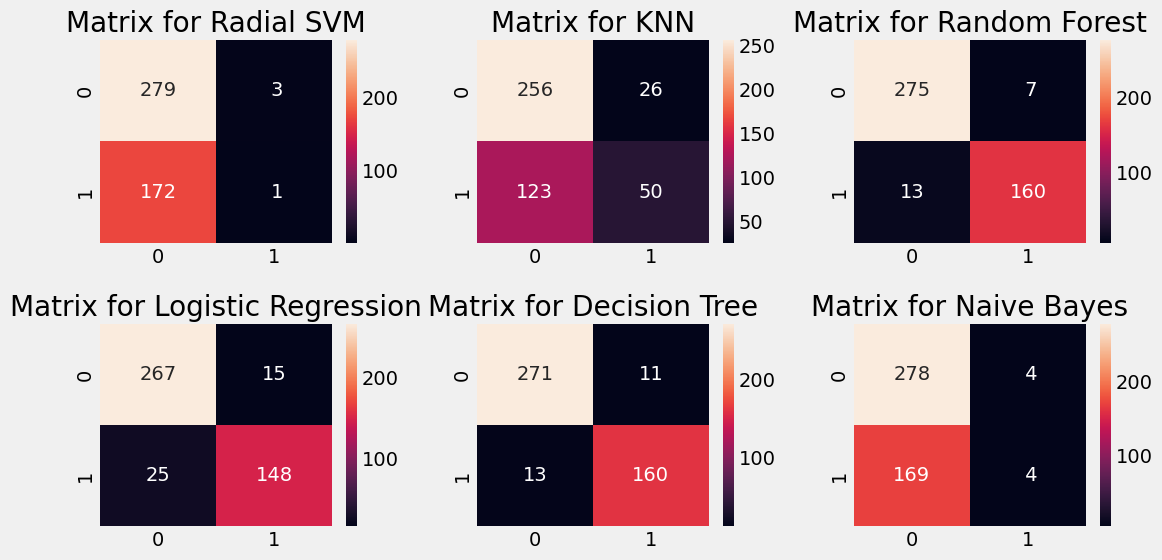

In [60]:
f, ax = plt.subplots(2, 3, figsize=(12, 6))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for Radial SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for Random Forest')

y_pred = cross_val_predict(LogisticRegression(), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), train_X, train_Y, cv=10)
sns.heatmap(confusion_matrix(train_Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

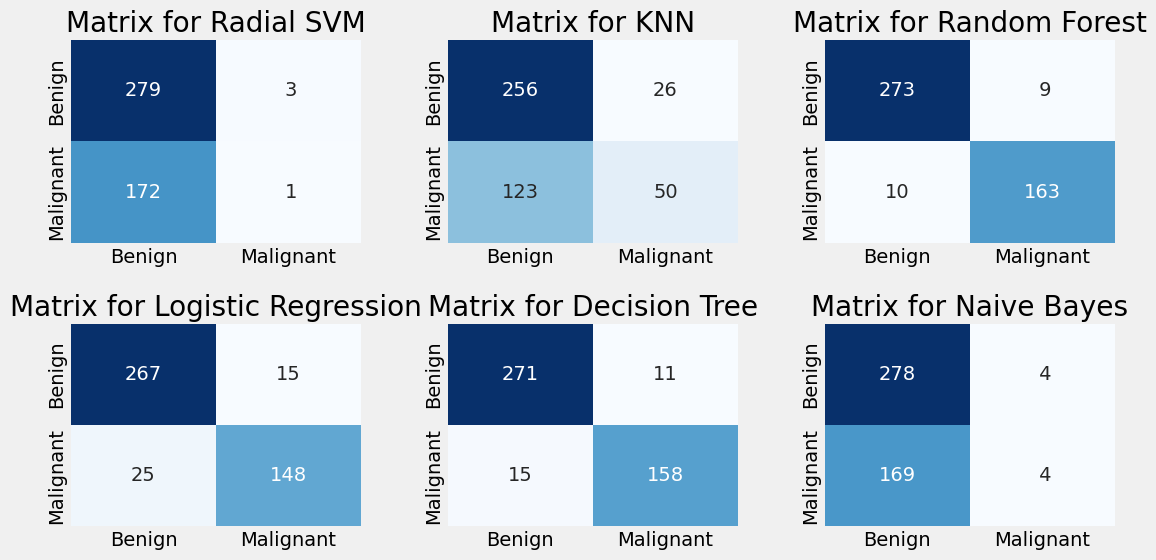

In [62]:
f, ax = plt.subplots(2, 3, figsize=(12, 6))

# Define models and titles
models = [
    (svm.SVC(kernel='rbf'), 'Radial SVM'),
    (KNeighborsClassifier(n_neighbors=9), 'KNN'),
    (RandomForestClassifier(n_estimators=100), 'Random Forest'),
    (LogisticRegression(), 'Logistic Regression'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (GaussianNB(), 'Naive Bayes')
]

for i, (model, title) in enumerate(models):
    y_pred = cross_val_predict(model, train_X, train_Y, cv=10)
    cm = confusion_matrix(train_Y, y_pred)
    
    sns.heatmap(cm, ax=ax[i // 3, i % 3], annot=True, fmt='2.0f', cmap='Blues', cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    ax[i // 3, i % 3].set_title(f'Matrix for {title}')
    
    # Move x-axis and y-axis labels to the top and left respectively
    ax[i // 3, i % 3].xaxis.set_label_position('top')
    ax[i // 3, i % 3].xaxis.label.set_visible(False)
    ax[i // 3, i % 3].yaxis.set_label_position('left')
    ax[i // 3, i % 3].yaxis.label.set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


Confusion Matrix for Random Forest:
[[40  3]
 [ 1 70]]



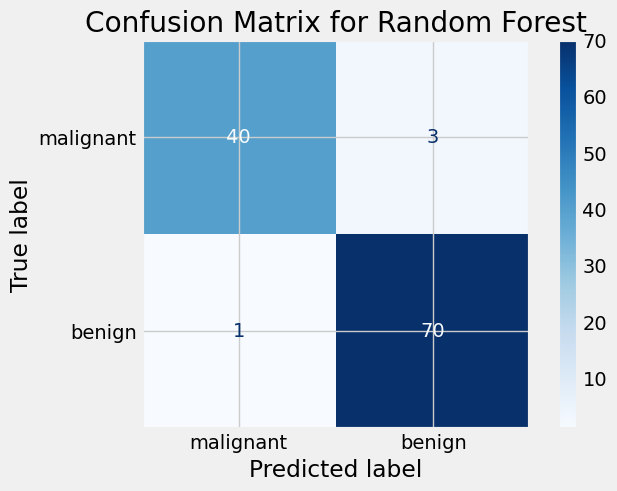

Accuracy for Random Forest: 0.96

Confusion Matrix for KNN:
[[38  5]
 [ 0 71]]



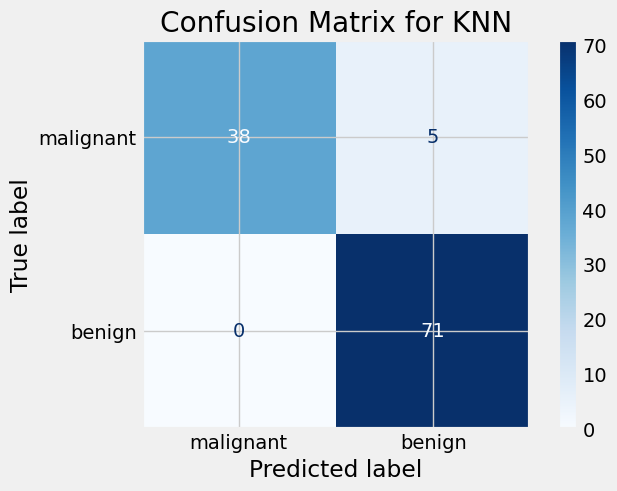

Accuracy for KNN: 0.96

Confusion Matrix for Decision Tree:
[[39  4]
 [ 3 68]]



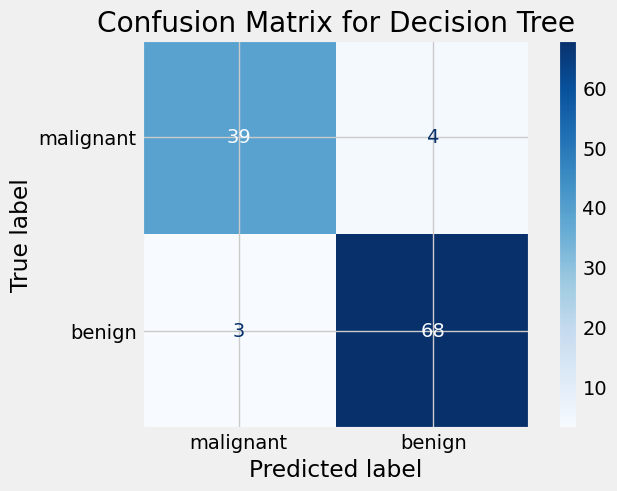

Accuracy for Decision Tree: 0.94

Confusion Matrix for Naive Bayes:
[[40  3]
 [ 0 71]]



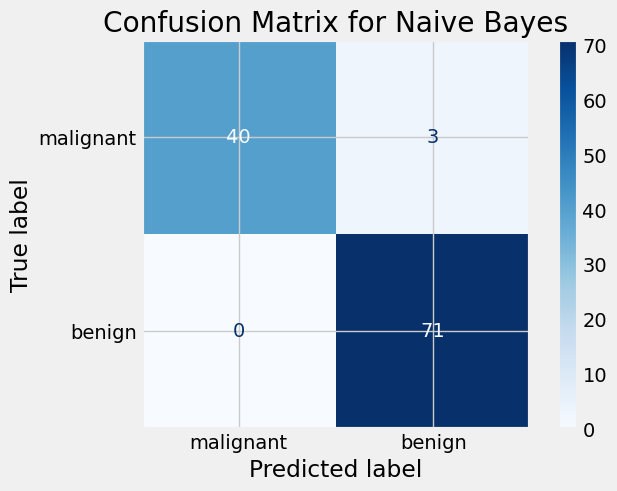

Accuracy for Naive Bayes: 0.97

Confusion Matrix for Logistic regression:
[[38  5]
 [ 1 70]]



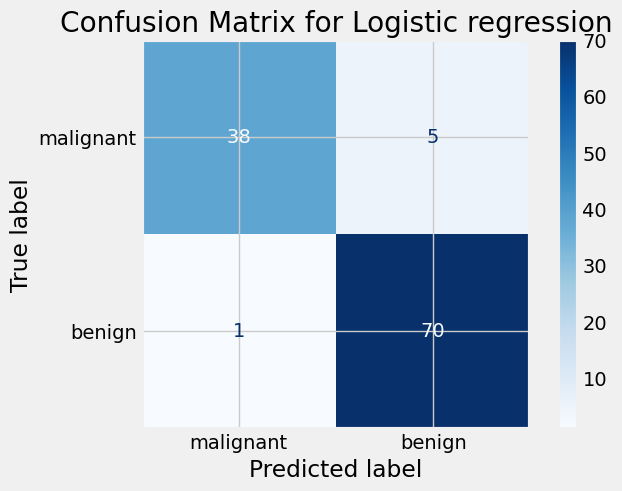

Accuracy for Logistic regression: 0.95



In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic regression": LogisticRegression(),
}

# Evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix
    print(f"Confusion Matrix for {name}:\n{cm}\n")
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    # Print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}\n")


In [68]:
#Hyperparameter tuning
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=10, n_jobs=-1, verbose=2)

grid_search.fit(train_X, train_Y)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score found:  0.9671014492753622


In [70]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB())
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,train_X,train_Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.9736842105263158
The cross validated score is 0.9560386473429953
